In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('train.csv')

In [10]:
def transformador(df):
    df2=df
    df2=df2.drop(columns='Price')
    f=pd.get_dummies(df2.select_dtypes(object)).astype(int)
    df2['Screen Size']=df['Screen Size'].apply(lambda x : float(x.replace('"','') )* 254*1e-4)
    df2['RAM_GB']=df['RAM'].str.replace('GB','').astype(int)
    df2['Weight']=df['Weight'].str.replace('kg','').astype(float)
    df2['CPU_inf']=df['CPU'].apply(lambda x : ' '.join(x.split()[:-1]))
    df2['CPU_GHz']=df['CPU'].apply(lambda x : ''.join(x.split()[-1])).str.replace('GHz','').astype(float)
    df2=df2.drop(columns=['CPU','RAM'])
    a=df2[list(df2.select_dtypes(int).columns) + list(df2.select_dtypes(float).columns)]
    sol=pd.concat([a,f],axis=1)
    return sol,df2

In [11]:
X,df2=transformador(df)
X
y=df['Price']
df3=pd.concat([X,y],axis=1)

In [12]:
df4=pd.concat([df2,y],axis=1)

<Axes: >

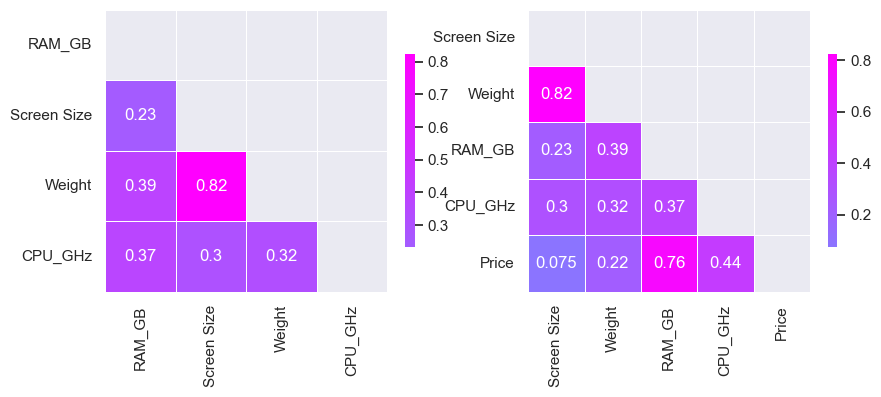

In [13]:
fig ,axs = plt.subplots(1,2,figsize=(10, 5))

sns.set(style='dark')

im = X[['RAM_GB','Screen Size','Weight','CPU_GHz']]
im2 = df4.select_dtypes([int,float])
mask = np.triu(np.ones_like(im.corr(), dtype=bool))
mask2 = np.triu(np.ones_like(im2.corr(), dtype=bool))
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(im.corr(),
    ax=axs[0],
    cmap='cool',
    mask=mask,
    center=0,
    square=True,
    annot=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.5})
sns.heatmap(im2.corr(),
    ax=axs[1],
    cmap='cool',
    mask=mask2,
    center=0,
    square=True,
    annot=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.5})

In [14]:
X=df.drop(columns='Price')
X

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM_GB,Storage,GPU,Operating System,Operating System Version,Weight_kg
0,Apple,MacBook Pro,Ultrabook,0.33782,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37
1,Apple,Macbook Air,Ultrabook,0.33782,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34
2,HP,250 G6,Notebook,0.39624,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86
3,Apple,MacBook Pro,Ultrabook,0.39116,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83
4,Apple,MacBook Pro,Ultrabook,0.33782,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,0.43942,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows,10,4.42
973,Toshiba,Tecra A40-C-1DF,Notebook,0.35560,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows,10,1.95
974,Asus,Rog Strix,Gaming,0.43942,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.73
975,HP,Probook 450,Notebook,0.39624,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.70GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows,10,2.04


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


X = df[['Manufacturer','Screen Size','Screen','CPU','RAM',' Storage','GPU','Weight']]
y = df['Price'] 

X_encoded = pd.get_dummies(X).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Error cuadrático medio:', rmse)

Error cuadrático medio: 3.5305698639976545e+18


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred,squared=False)
print('Error cuadrático medio:', rmse)

Error cuadrático medio: 8253004445219436.0


In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5) 

print("Precisión en cada iteración:", scores)
print("Precisión promedio:", scores.mean())

Precisión en cada iteración: [-1.65012677e+19 -1.09858791e+18 -4.40519846e+18 -1.71165260e+17
 -6.21532665e+18]
Precisión promedio: -5.678309201930757e+18
